In [2]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data preprocessing 

df = pd.read_csv('avocado.csv')

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = df.drop(['Unnamed: 0'], axis = 1) #drop the useless column

In [6]:
#Renaming the columns and for the avocados with product look up codes naming them to small, large and xlarge
names = ["date", "avprice", "totalvol", "small","large","xlarge","totalbags","smallbags","largebags","xlargebags","type","year","region"] #get new column names
data = data.rename(columns=dict(zip(data.columns, names))) #rename columns
data.head()

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1517 non-null   object 
 1   avprice     1517 non-null   float64
 2   totalvol    1517 non-null   float64
 3   small       1517 non-null   float64
 4   large       1517 non-null   float64
 5   xlarge      1517 non-null   float64
 6   totalbags   1517 non-null   float64
 7   smallbags   1517 non-null   float64
 8   largebags   1517 non-null   float64
 9   xlargebags  1517 non-null   float64
 10  type        1517 non-null   object 
 11  year        1517 non-null   float64
 12  region      1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [8]:
#look at data types, I see that date is not datetime, so will sort the data by date and then divide the dates into day-month-year for a better analysis.

In [9]:

data['Day'], data['Month'],  data['Year'] = data['date'].str.split('-').str
data.head(10)


,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Day,Month,Year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,12,2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,12,2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,12,2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,06,12,2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,11,2015
5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany,22,11,2015
6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany,15,11,2015
7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany,08,11,2015
8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany,01,11,2015
9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany,25,10,2015


In [10]:
#Visualizations

In [11]:
#Looking at the distribution of price

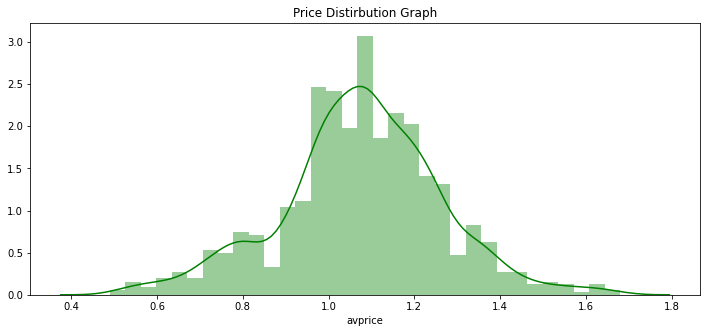

In [12]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(data["avprice"], color = 'g')

In [13]:
# we can see that the weight is in the price range of $ 1.15

In [14]:
#Lets visualise price over other dimensions

In [15]:
#Weight distribution of prices

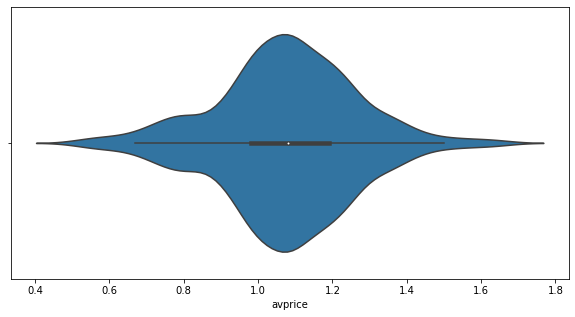

In [16]:
#Plotting a violin plot
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(data.dropna(subset = ['avprice']).avprice)

In [17]:
#Price distribution in general over time

Text(0.5, 1.0, 'Average Price')

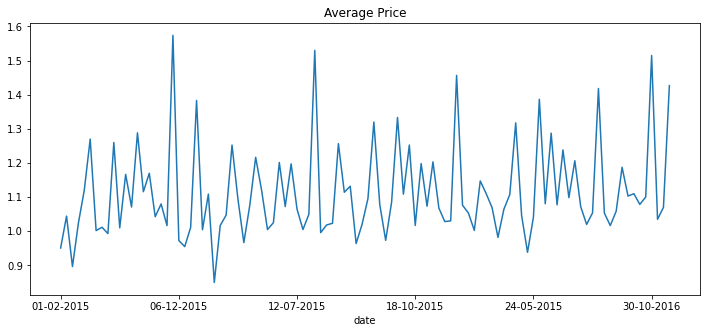

In [18]:
dategroup=data.groupby('date').mean()
plt.figure(figsize=(12,5))
dategroup['avprice'].plot(x=data.date)
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price by Month')

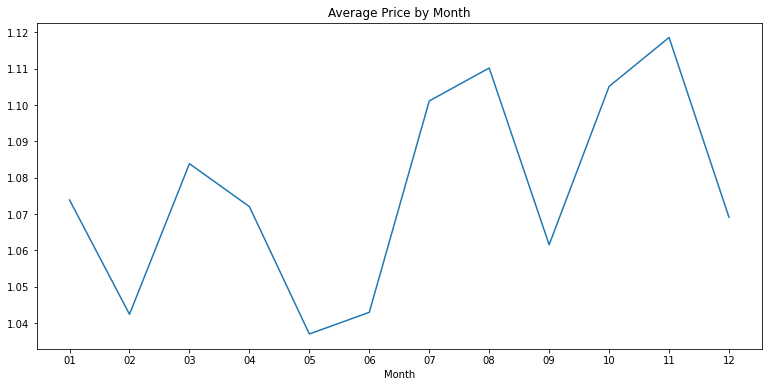

In [19]:
#To capture changes because of season which may have impacted price
dategroup=data.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(13,6))
ax.xaxis.set(ticks=range(0,14)) 
dategroup['avprice'].plot(x=data.Month)
plt.title('Average Price by Month')

Text(0.5, 1.0, 'Average Price by Day')

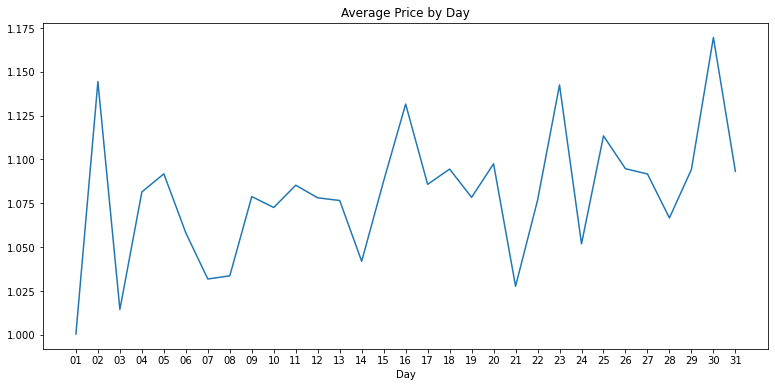

In [20]:
#To check for the changes in price by day 

#To capture changes because of season which may have impacted price
dategroup=data.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(13,6))
ax.xaxis.set(ticks=range(0,31)) 
dategroup['avprice'].plot(x=data.Day)
plt.title('Average Price by Day')

In [21]:
#There may be a change in the price over days as there may be festivals , weekly discounts running 

In [22]:

#Again an extremely important graphic reason for us is the price change between the states

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

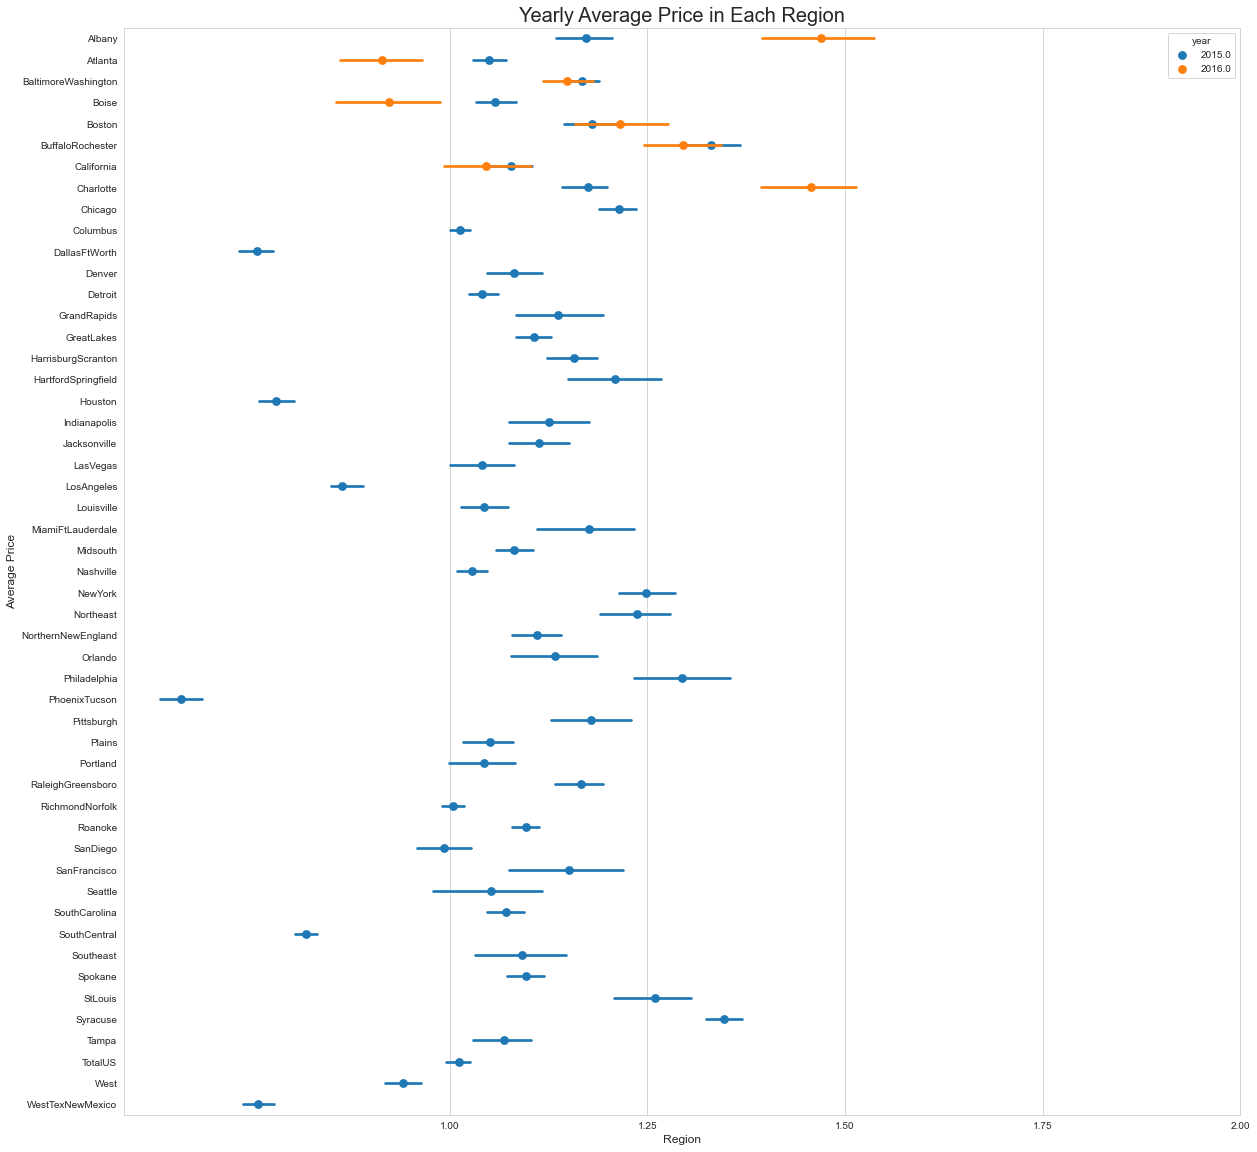

In [23]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='avprice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

In [24]:
# Average Price in Each Region.we can see price changes according to type in cities, organic avocado is more expensive as a standard

Text(0.5, 1.0, 'Type Average Price in Each Region')

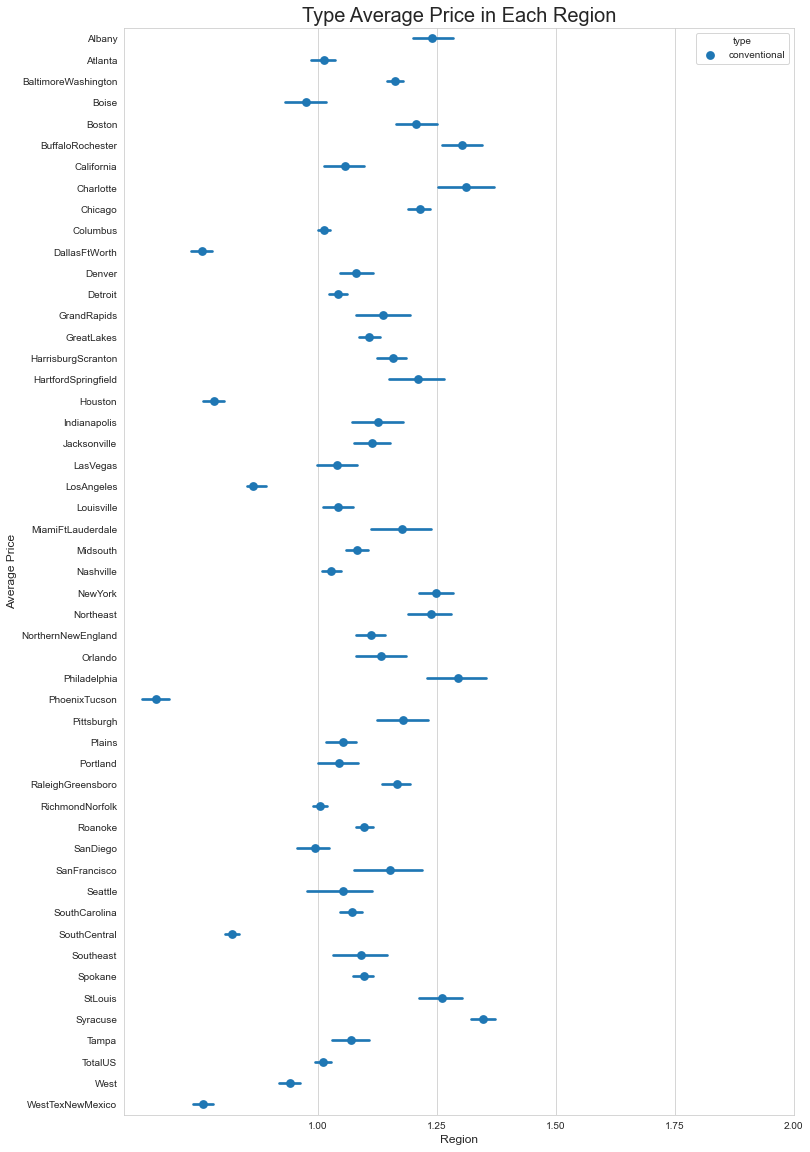

In [25]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='avprice',y='region',data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [26]:
#Type 

conventional    1517
Name: type, dtype: int64


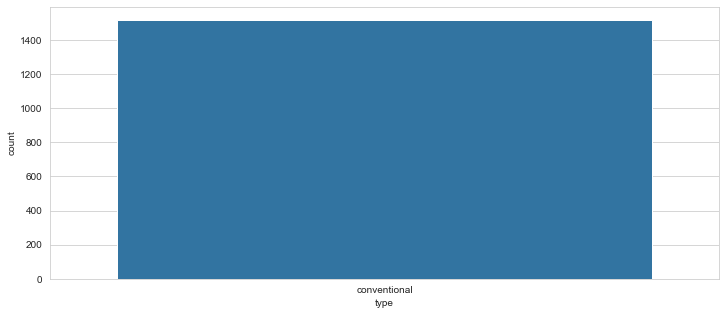

In [27]:
print(data['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(data['type'])
plt.show()

In [28]:
#Since there is just one type in the dataset that wont add any value to the analysis

In [29]:
#Price over time

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

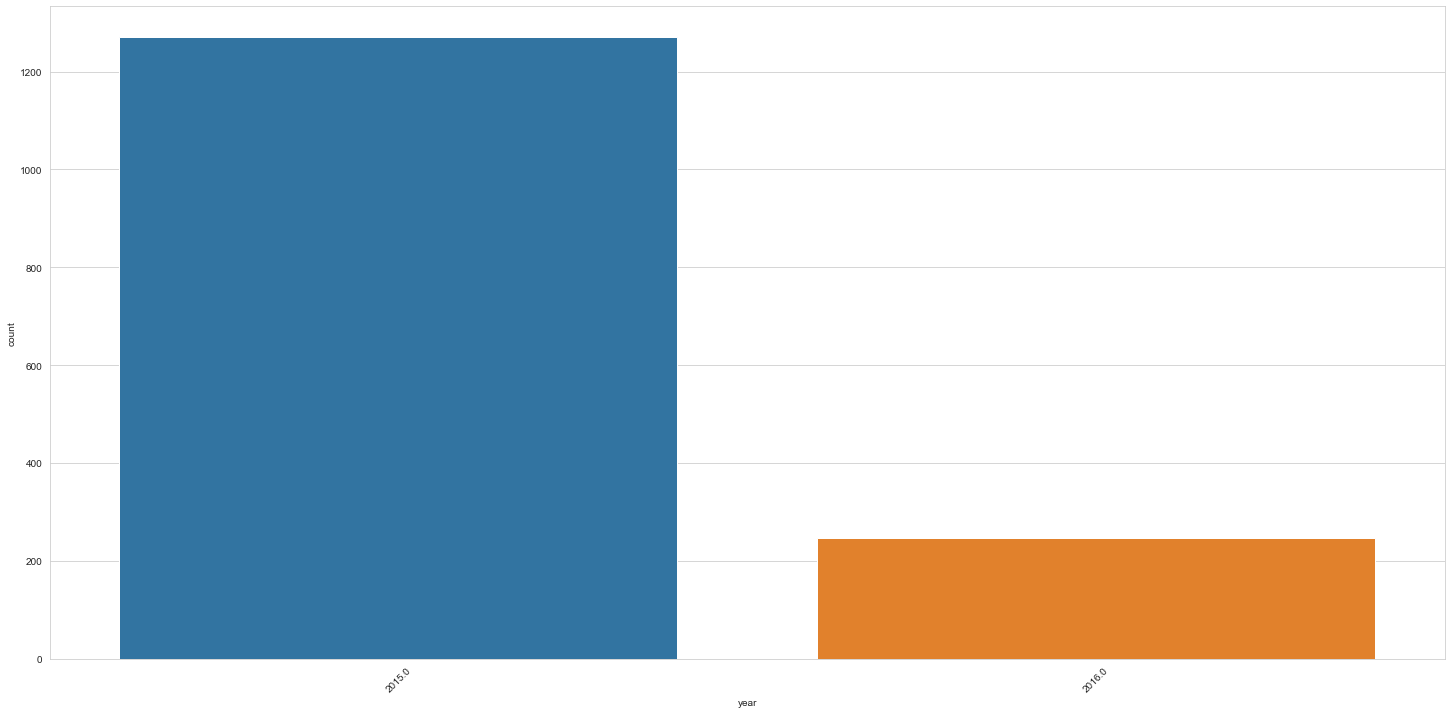

In [30]:

plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

In [31]:
#This does show a decrease in the demand over the years however lets do a modelling to understand

In [32]:
#Call Prophet Model
#prophet function and train the model

In [33]:
#!pip install pystan

In [34]:

#conda install -c conda-forge fbprophet


Importing plotly failed. Interactive plots will not work.


In [37]:
data

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Day,Month,Year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,12,2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,12,2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,12,2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,06,12,2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


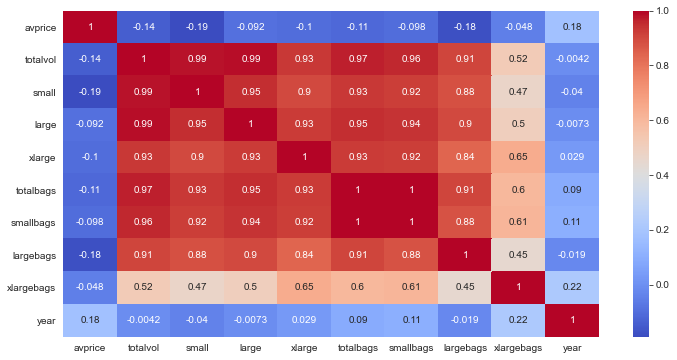

In [38]:
#Correlation

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [39]:
#Feature engineering for model building


In [40]:

df['region'].nunique()

51

In [41]:
df['type'].nunique()

1

In [43]:
#As we can see we have 51 regions and 1 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

#I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day

In [47]:
df_final=pd.get_dummies(data.drop(['region','date'],axis=1),drop_first=True)

In [48]:
df_final

,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,year,...,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12,Year_2016
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous

In [53]:
X

,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,year,Day_02,Day_03,Day_04,Day_05
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [63]:
data.replace(np.nan,0)

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Day,Month,Year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,12,2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,12,2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,12,2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,06,12,2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0,0,0,0
16464,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0,0,0,0
16465,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0,0,0,0
16466,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0,0,0,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1517 non-null   object 
 1   avprice     1517 non-null   float64
 2   totalvol    1517 non-null   float64
 3   small       1517 non-null   float64
 4   large       1517 non-null   float64
 5   xlarge      1517 non-null   float64
 6   totalbags   1517 non-null   float64
 7   smallbags   1517 non-null   float64
 8   largebags   1517 non-null   float64
 9   xlargebags  1517 non-null   float64
 10  type        1517 non-null   object 
 11  year        1517 non-null   float64
 12  region      1517 non-null   object 
 13  Day         1517 non-null   object 
 14  Month       1517 non-null   object 
 15  Year        1517 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [77]:
df =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [68]:
data.iloc[data.values==np.inf]

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Day,Month,Year


In [69]:
data = data.dropna()

In [70]:
data

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Day,Month,Year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,27,12,2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,20,12,2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,13,12,2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,06,12,2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,16,10,2016
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,09,10,2016
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,02,10,2016
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,25,09,2016


In [82]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [85]:
X_test.fillna(X_test.mean())


,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,year,Day_02,Day_03,Day_04,Day_05
10671,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
4639,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
2189,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
6648,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
8511,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
7496,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
12409,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0
16272,1.465673e+06,577984.420853,540379.174437,50352.216007,296956.894505,252413.798191,42064.477747,2478.618567,2015.153584,0,0,0,0


In [88]:
np.where(data.values == np.finfo(np.float64).max) 


(array([], dtype=int64), array([], dtype=int64))

In [95]:
df1 = df_final.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   avprice     1517 non-null   float64
 1   totalvol    1517 non-null   float64
 2   small       1517 non-null   float64
 3   large       1517 non-null   float64
 4   xlarge      1517 non-null   float64
 5   totalbags   1517 non-null   float64
 6   smallbags   1517 non-null   float64
 7   largebags   1517 non-null   float64
 8   xlargebags  1517 non-null   float64
 9   year        1517 non-null   float64
 10  Day_02      1517 non-null   uint8  
 11  Day_03      1517 non-null   uint8  
 12  Day_04      1517 non-null   uint8  
 13  Day_05      1517 non-null   uint8  
 14  Day_06      1517 non-null   uint8  
 15  Day_07      1517 non-null   uint8  
 16  Day_08      1517 non-null   uint8  
 17  Day_09      1517 non-null   uint8  
 18  Day_10      1517 non-null   uint8  
 19  Day_11      1517 non-null  

In [99]:

X=df1.iloc[:,1:14]
y=df1['avprice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13164324861493204
MSE: 0.029592081672484588
RMSE: 0.17202349162973232


In [102]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [103]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.057224342105263205
MSE: 0.0059482306578947505
RMSE: 0.07712477330854692


In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [105]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07657894736842105
MSE: 0.012638157894736844
RMSE: 0.1124195618864299


In [106]:
#Model Saving 

#The RMSE is the lowest with Randomforestregressor and hence thats the best among the three models

In [107]:
import pickle
filename='Avocado.pkl'
pickle.dump(rdr,open(filename,'wb'))

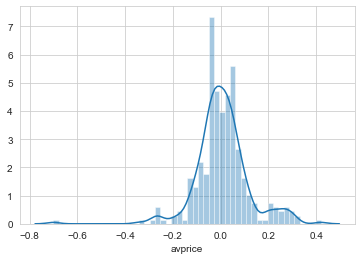

In [108]:
sns.distplot((y_test-pred),bins=50)

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Day,Month,Year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,12,2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,12,2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,12,2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,06,12,2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,11,2015


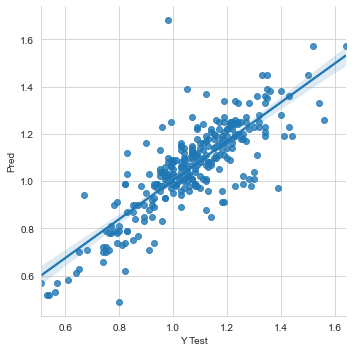

In [109]:
data1 = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data1,palette='rainbow')
data.head()

In [ ]:
#The graph is also normally distributed shows that its a good choice and with the least mean squared error the right model has been chosen